In [1]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os
print('\n'.join(os.listdir('./drive/My Drive/Colab Test (Bootcamp ML 2020)/Bootcamp Images')))

lenna.png
sudoku.png
camera.png
lena-salt-pepper.png
lena-noisy.png
phones.png
phones-noise-salt-pepper-2.png
phones-salt-pepper-1.png
phones-noise-1.png
phones-noise-2.png


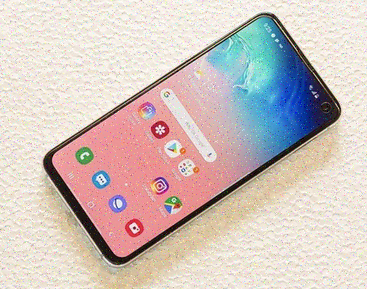

In [4]:
foto = cv.imread('./drive/My Drive/Colab Test (Bootcamp ML 2020)/Bootcamp Images/phones-noise-1.png')
cv2_imshow(foto)

In [5]:
#merepresentasikan warna dari 1 pixel dari yang paling kiri atas (BGR)
print(foto)

[[[227 236 244]
  [255 237 225]
  [226 236 243]
  ...
  [215 225 233]
  [219 231 236]
  [223 234 241]]

 [[228 238 245]
  [227 237 244]
  [229 238 245]
  ...
  [183 193 224]
  [225 236 243]
  [222 234 241]]

 [[225 233 242]
  [225 234 242]
  [229 237 246]
  ...
  [228 237 244]
  [224 234 241]
  [226 235 242]]

 ...

 [[230 255 237]
  [229 238 247]
  [219 230 240]
  ...
  [222 232 241]
  [225 235 244]
  [255 190 255]]

 [[221 231 238]
  [228 238 247]
  [255 203 219]
  ...
  [225 233 242]
  [223 232 241]
  [224 233 242]]

 [[188 200 210]
  [205 217 227]
  [220 232 243]
  ...
  [227 236 245]
  [182 209 244]
  [231 240 249]]]


In [6]:
foto.shape

(289, 367, 3)

In [7]:
#Terdapat 289 array x 367 array yang berisi detail dari warna-warna bgr
height, width = foto.shape[:2]

print('Height', height)
print('Widht', width)

Height 289
Widht 367


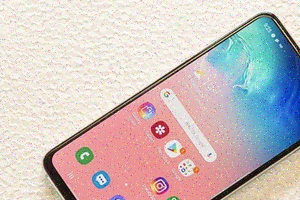

In [8]:
#Crop gambar
copy_foto = foto.copy()
copy_foto = copy_foto[:200, :300]

cv2_imshow(copy_foto)

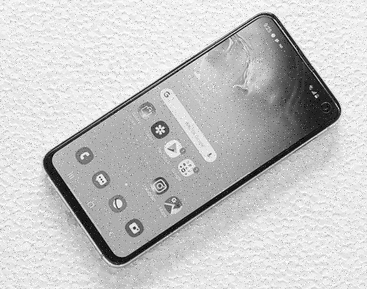

In [9]:
#Ubah menjadi warna greyscale
foto_grey = cv.cvtColor(foto, cv.COLOR_BGR2GRAY)
cv2_imshow(foto_grey)

In [10]:
print(foto_grey)

[[237 235 237 ... 226 231 235]
 [239 238 239 ... 201 237 235]
 [235 235 239 ... 238 235 236]
 ...
 [247 240 232 ... 234 237 217]
 [232 240 214 ... 235 234 235]
 [202 219 234 ... 238 216 242]]


(array([  13.,    3.,    6.,    5.,    7.,    9.,    7.,    9.,   13.,
         11.,   17.,   29.,   25.,   22.,   26.,   41.,   46.,   44.,
         86.,   84.,  111.,  144.,  160.,  158.,  156.,  172.,  168.,
        145.,  155.,  118.,  126.,  123.,  139.,  148.,  168.,  135.,
        155.,  132.,  111.,  105.,  106.,   99.,  100.,   94.,   78.,
         79.,   68.,   70.,   69.,   65.,   79.,   66.,   75.,   80.,
         81.,   76.,   88.,   75.,   84.,   74.,   59.,   63.,   65.,
         71.,   74.,   77.,   77.,   68.,   60.,   71.,   71.,   59.,
         53.,   64.,   65.,   70.,   70.,   58.,   70.,   59.,   53.,
         75.,   58.,   73.,   64.,   47.,   76.,   76.,   54.,   57.,
         69.,   69.,   81.,   66.,   69.,   64.,   82.,   60.,   74.,
         76.,   64.,   79.,   51.,   74.,   62.,   69.,   72.,   61.,
         62.,   68.,   75.,   74.,   64.,   77.,   73.,   76.,   74.,
         76.,   78.,   86.,   72.,   82.,   92.,  100.,   93.,   78.,
         98.,   93.

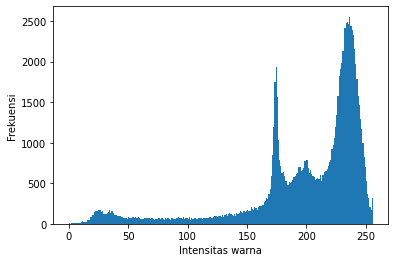

In [11]:
print(plt.hist(foto_grey.flatten(), 256, [0, 256]), '\n')
plt.xlabel('Intensitas warna')
plt.ylabel('Frekuensi')
plt.show()

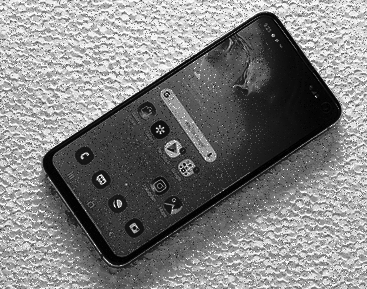

In [12]:
#Equalize agar persebaran warnanya semakin bervariasi
equalized = cv.equalizeHist(foto_grey)
cv2_imshow(equalized)

(array([ 202.,  412.,  304.,  486.,  468.,  367.,  455.,  422.,  421.,
        419.,  349.,  475.,  416.,  427.,  382.,  443.,  390.,  411.,
        420.,  407.,  404.,  454.,  432.,  362.,  384.,  477.,  330.,
        473.,  434.,  440.,  325.,  318.,  555.,  390.,  385.,  439.,
        451.,  266.,  601.,  311.,  371.,  435.,    0.,  592.,    0.,
        846.,    0., 1193.,    0.,    0.,    0.,    0., 1746.,    0.,
          0.,    0., 1934.,    0.,    0.,    0., 1569.,    0.,    0.,
       1031.,  783.,    0.,  716.,    0.,  624.,  636.,    0.,  595.,
        526.,  524.,  478.,    0.,  519.,  502.,  511.,  541.,    0.,
        583.,  586.,    0.,  615.,  632.,    0.,  703.,  706.,    0.,
        647.,    0.,  665.,  693.,    0.,  776.,    0.,  779.,    0.,
        785.,    0.,  687.,  623.,    0.,  658.,  612.,    0.,  586.,
        571.,  542.,    0.,  550.,  568.,  558.,    0.,  607.,  528.,
        599.,    0.,  603.,  639.,    0.,  646.,    0.,  672.,  710.,
          0.,  766.

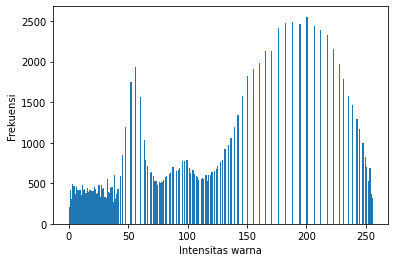

In [13]:
#plot histogram setelah di equalize
print(plt.hist(equalized.flatten(), 256, [0, 256]), '\n')
plt.xlabel('Intensitas warna')
plt.ylabel('Frekuensi')
plt.show()

### **FILTERING**

**1. Average Filtering**

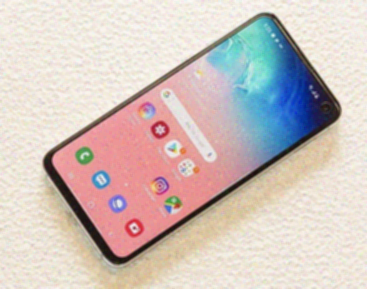

In [14]:
#Ukuran kernel 3x3
phone_blur = cv.blur(foto, (3, 3))
cv2_imshow(phone_blur)

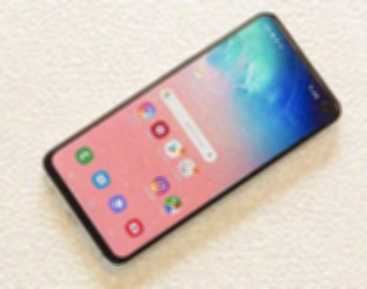

In [15]:
#Ukuran kernel 5x5
phone_blur2 = cv.blur(foto, (5,5))
cv2_imshow(phone_blur2)

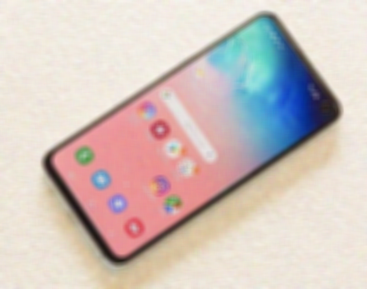

In [16]:
#Ukuran kernel 7x7
phone_blur3 = cv.blur(foto, (7,7))
cv2_imshow(phone_blur3)

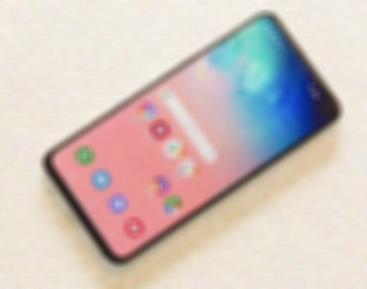

In [17]:
#Ukuran kernel 9x9
phone_blur4 = cv.blur(foto, (9, 9))
cv2_imshow(phone_blur4)

**2. Gaussian Filtering**

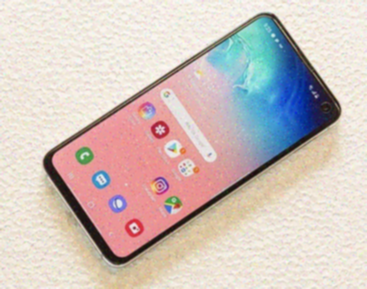

In [18]:
#Ukuran kernel 3x3
phone_gauss_blur = cv.GaussianBlur(foto, (3, 3), 0)
cv2_imshow(phone_gauss_blur)

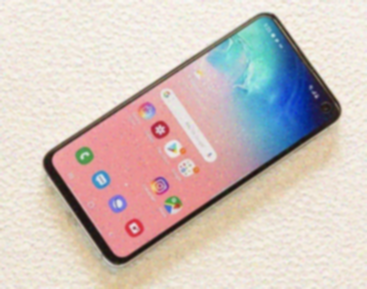

In [19]:
#Ukuran kernel 5x5
phone_gauss_blur2 = cv.GaussianBlur(foto, (5, 5), 0)
cv2_imshow(phone_gauss_blur2)

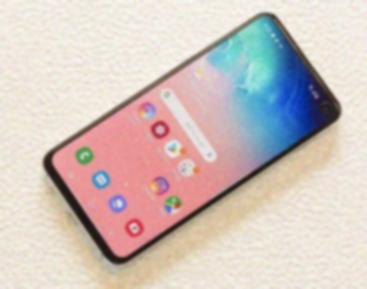

In [20]:
#Ukuran kernel 7x7
phone_gauss_blur3 = cv.GaussianBlur(foto, (7, 7), 0)
cv2_imshow(phone_gauss_blur3)

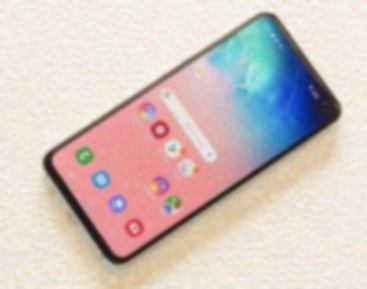

In [21]:
#Ukuran kernel 9x9
phone_gauss_blur4 = cv.GaussianBlur(foto, (9, 9), 0)
cv2_imshow(phone_gauss_blur4)

**3. Median Filtering**

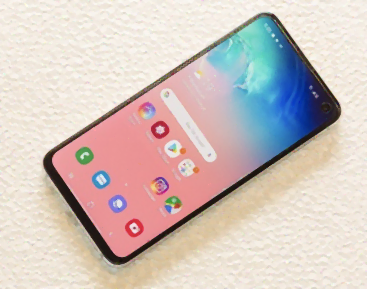

In [22]:
#Ukuran kernel 3
phone_median_blur = cv.medianBlur(foto, 3)
cv2_imshow(phone_median_blur)

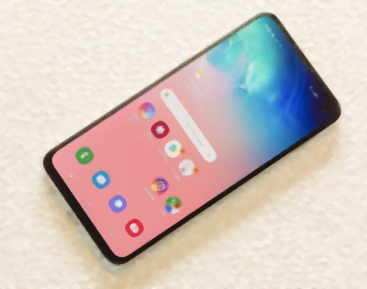

In [23]:
#Ukuran kernel 5
phone_median_blur2 = cv.medianBlur(foto, 5)
cv2_imshow(phone_median_blur2)

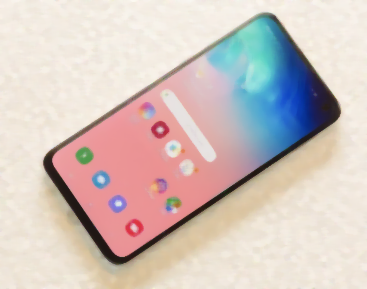

In [24]:
#Ukuran kernel 7
phone_median_blur3 = cv.medianBlur(foto, 7)
cv2_imshow(phone_median_blur3)

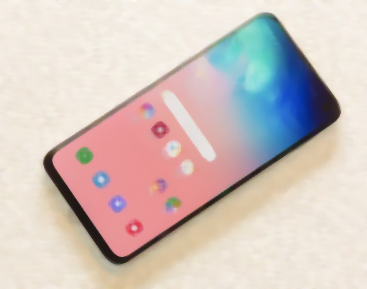

In [25]:
#Ukuran kernel 9
phone_median_blur4 = cv.medianBlur(foto, 9)
cv2_imshow(phone_median_blur4)

Hasil gambar terbaik yaitu gambar yang difilter dengan Median Filter dengan ukuran kernel 3

### **THRESHOLDING**

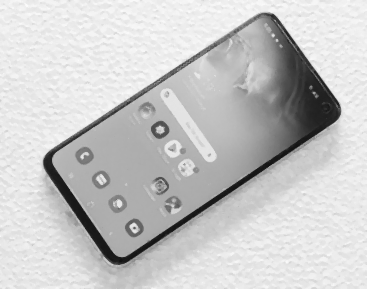

In [26]:
#Ubah ke greyscale
foto_phone = cv.cvtColor(phone_median_blur, cv.COLOR_BGR2GRAY)
cv2_imshow(foto_phone)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       3.000e+00, 5.000e+00, 4.700e+01, 1.020e+02, 1.250e+02, 2.230e+02,
       2.990e+02, 2.860e+02, 1.740e+02, 1.690e+02, 1.260e+02, 1.040e+02,
       6.600e+01, 7.700e+01, 1.270e+02, 1.840e+02, 2.180e+02, 1.830e+02,
       1.610e+02, 1.390e+02, 1.180e+02, 9.500e+01, 1.150e+02, 8.800e+01,
       8.800e+01, 5.900e+01, 6.200e+01, 6.200e+01, 6.100e+01, 8.200e+01,
       7.200e+01, 7.600e+01, 6.800e+01, 7.600e+01, 7.800e+01, 9.300e+01,
       9.500e+01, 8.100e+01, 7.700e+01, 8.600e+01, 8.400e+01, 7.900e+01,
       6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 8.100e+01, 8.500e+01,
       8.200e+01, 5.800e+01, 5.900e+01, 5.100e+01, 7.700e+01, 5.900e+01,
       4.300e+01, 6.200e+01, 5.100e+01, 5.700e+01, 6.700e+01, 6.400e+01,
       7.500e+01, 6.600e+01, 5.000e+01, 7.800e+01,

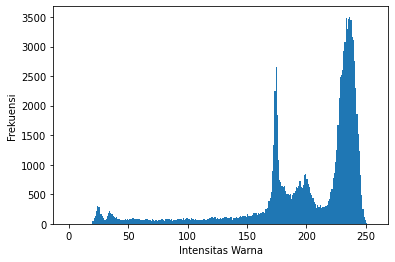

In [27]:
#Plot histogramnya
print(plt.hist(foto_phone.flatten(), 256, [0, 256]))
plt.xlabel('Intensitas Warna')
plt.ylabel('Frekuensi')
plt.show()

Pertama akan dilakukan **Global Thresholding** dengan beberapa parameter

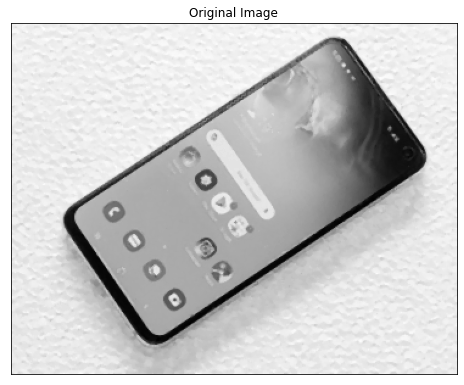

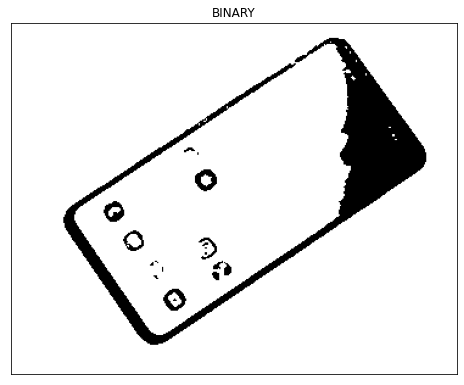

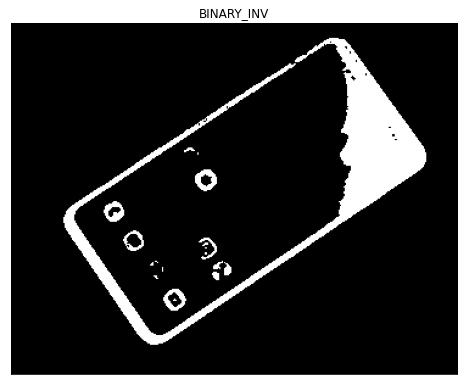

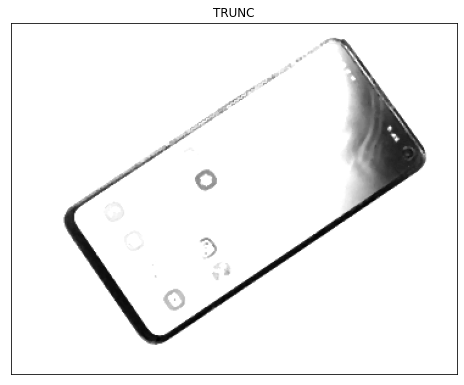

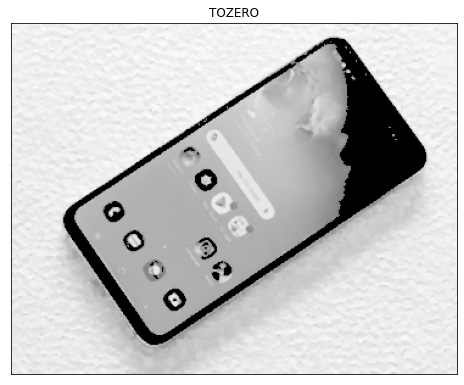

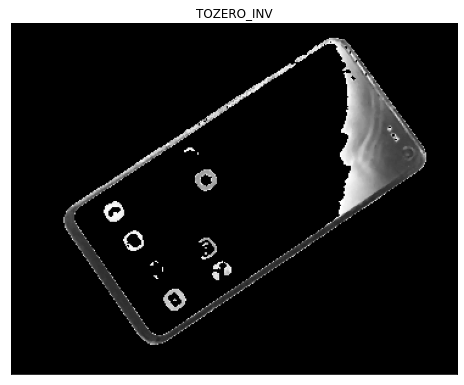

In [28]:
tv,tr = cv.threshold(foto_phone, 127, 255, cv.THRESH_BINARY)
tv1,tr1 = cv.threshold(foto_phone, 127, 255, cv.THRESH_BINARY_INV)
tv2,tr2 = cv.threshold(foto_phone, 127, 255, cv.THRESH_TRUNC)
tv3,tr3 = cv.threshold(foto_phone, 127, 255, cv.THRESH_TOZERO)
tv4,tr4 = cv.threshold(foto_phone, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [foto_phone, tr, tr1, tr2, tr3, tr4]

for i in range(6):
  fig = plt.figure(figsize=(8, 8))
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Untuk kedepannya akan digunakan cv.THRESH_BINARY

Berikutnya Global Thresholding dibandingkan dengan **Adaptive Threshold** dan **Otsu Threshold**

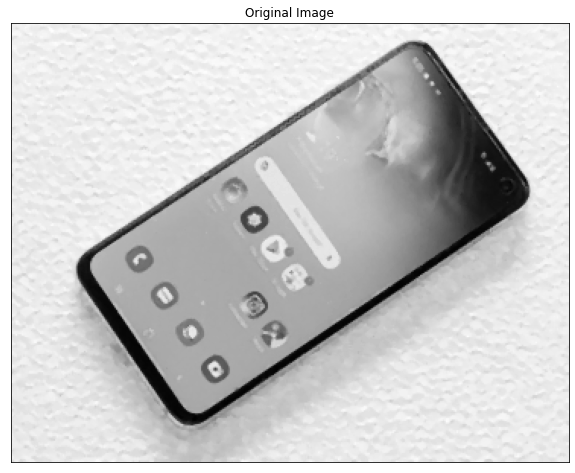

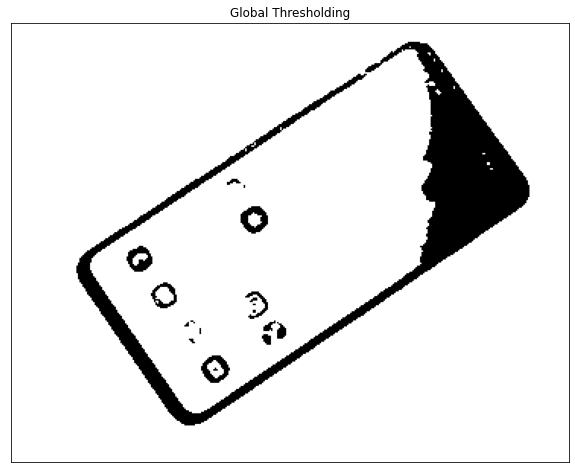

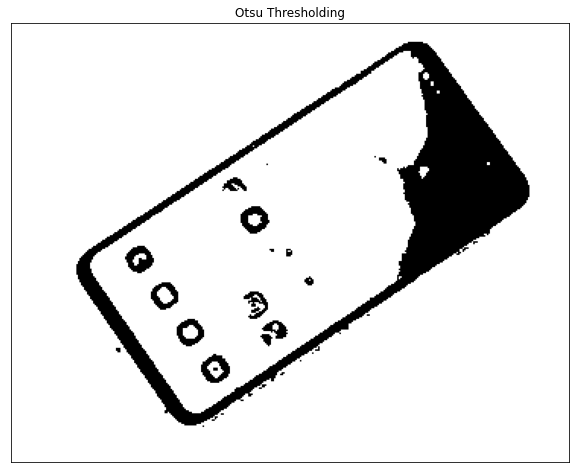

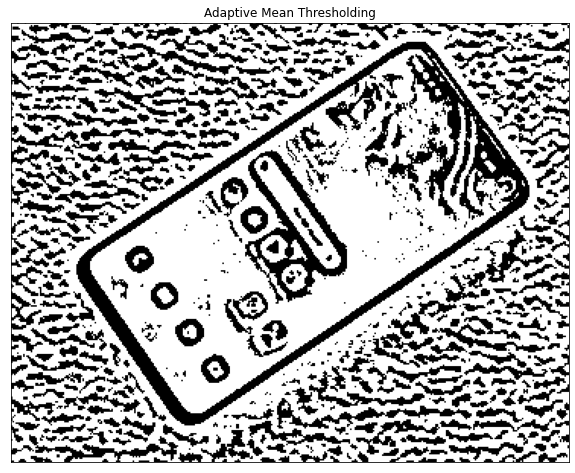

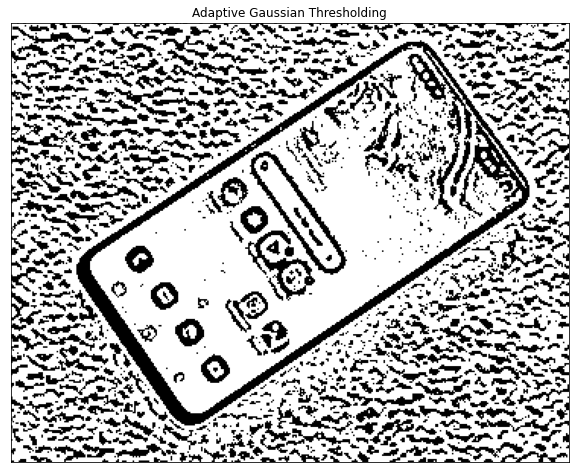

In [29]:
tv,tr = cv.threshold(foto_phone, 127, 255, cv.THRESH_BINARY)

tv1, tr1 = cv.threshold(foto_phone, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

tr2 = cv.adaptiveThreshold(foto_phone, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

tr3 = cv.adaptiveThreshold(foto_phone, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding', 'Otsu Thresholding', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [foto_phone, tr, tr1, tr2, tr3]

for i in range(5):
  fig = plt.figure(figsize=(10, 10))
  plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Untuk foto Phones Noise 1, hasil thresholding terbaik diperoleh dengan Otsu Threshold karena objek dan latarnya dapat dibedakan dengan jelas